In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

<img src="../input/jerarquico.png">

# Importación de datos

In [3]:
data = pd.read_csv('datos limpios')
data.head()

,Unnamed: 0,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


# Tratando datos para el dendograma

In [4]:
data_2=data.drop(columns=['PRUEBA','Unnamed: 0', 'YEAR', 'DEPURADORA','MONTH_2','DATE','MONTH'], axis=1)
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2
0,5.0,15.8,0.91,5.0,0
1,5.0,14.9,0.84,4.0,0
2,5.0,9.8,0.63,3.0,0
3,5.0,7.0,0.67,3.0,0
4,5.0,9.7,0.85,4.0,0


In [5]:
data_3=data_2.drop(columns=['DEPURADORA_2'])
data_3.head()

,DBO5,NT,PT,SS
0,5.0,15.8,0.91,5.0
1,5.0,14.9,0.84,4.0
2,5.0,9.8,0.63,3.0
3,5.0,7.0,0.67,3.0
4,5.0,9.7,0.85,4.0


# Cluster jerárquico (dendrograma,todo el data)

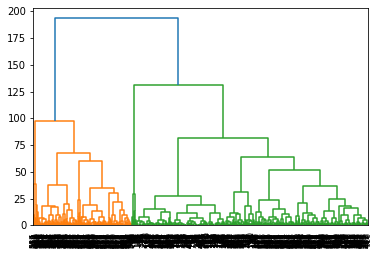

In [6]:
#Se crea una matriz de conexion(usa el método ward  para agrupar los cluster,para realizar
#la agrupación se basa en la distancia Euclidea):

cluster_jerarquico=linkage(data_3, 'ward')
dendrogram(cluster_jerarquico, leaf_rotation=90., leaf_font_size=8.)
plt.show();

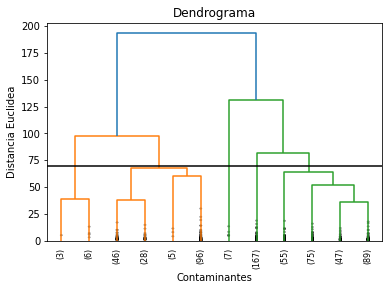

In [7]:
dendrogram(cluster_jerarquico, truncate_mode='lastp', p=12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Contaminantes')
plt.ylabel('Distancia Euclidea')
max_d = 70
plt.axhline(y=max_d, c='k')
plt.show();

El número de cluster,correspondeŕa con el valor medio de la máxima distancia,en este caso sera 70.Se traza una linea horizontal para determinar el número de cluster que hay,que será el número de lineas verticales con el que corte nuestra linea horizontal,en este caso es 4.

In [8]:
hc=AgglomerativeClustering(n_clusters=4,
                          affinity='euclidean',
                          linkage='ward')
y_hc=hc.fit_predict(data_3)

In [9]:
data_2['Cluster']=hc.labels_
data_2.head()

,DBO5,NT,PT,SS,DEPURADORA_2,Cluster
0,5.0,15.8,0.91,5.0,0,0
1,5.0,14.9,0.84,4.0,0,0
2,5.0,9.8,0.63,3.0,0,0
3,5.0,7.0,0.67,3.0,0,0
4,5.0,9.7,0.85,4.0,0,0


## Análisis datos en función de los clusters

Se observan valores muy parecidos en el caso del NT en los casos de los grupos 0 y 3,pudiendo llegar a confundirse.

In [10]:
data_2.groupby(['Cluster'])['NT'].mean()

Cluster
0    10.048462
1    11.096092
2    45.318182
3    10.518978
Name: NT, dtype: float64

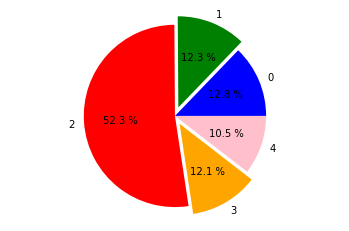

In [11]:
nitrogeno = [11.096092, 10.659237, 45.318182, 10.518978, 9.075610]
cluster = ['0', '1', '2', '3', '4']
colores = ["blue","green","red","orange","pink"]
desfase = (0, 0.1, 0, 0.1, 0)
plt.pie(nitrogeno, labels=cluster,autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()


In [12]:
data_2.groupby(['Cluster'])['PT'].mean() 

Cluster
0    0.576365
1    0.691114
2    0.537143
3    0.760000
Name: PT, dtype: float64

En el caso del P se observa que los valores del grupo 2 y 4 son muy parecidos,por lo que en este caso tambín se podría generar una confusión entre ambos.

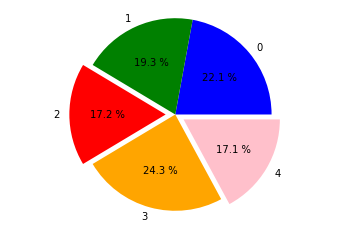

In [13]:
fosforo = [0.691114, 0.602797, 0.537143, 0.760000, 0.534263]
cluster = ['0', '1', '2', '3', '4']
colores = ["blue","green","red","orange","pink"]
desfase = (0, 0, 0.1, 0, 0.1)
plt.pie(fosforo, labels=cluster,autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()


In [14]:
data_2.groupby(['Cluster'])['SS'].mean() 

Cluster
0     5.821016
1    14.742857
2     4.000000
3    38.333333
Name: SS, dtype: float64

Tanto en el caso de los SS(solidos en suspensión ) como en el de DBO5, los grupos estan bien diferenciados. 

In [15]:
data_2.groupby(['Cluster'])['DBO5'].mean()

Cluster
0     5.609238
1    12.051429
2     5.714286
3    12.333333
Name: DBO5, dtype: float64

## Representación cluster obtenidos

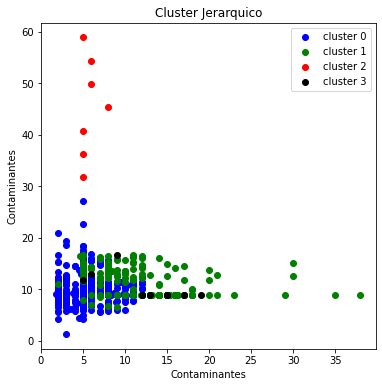

In [16]:
x=data_3.iloc[:, [0, 1, 2, 3]].values
fig=plt.figure(figsize= (6,6))
ax =fig.add_subplot(1, 1, 1)
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], c='blue', label='cluster 0')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], c='green', label='cluster 1')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], c='red', label='cluster 2')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], c='black', label='cluster 3')
plt.title("Cluster Jerarquico")
plt.xlabel('Contaminantes')
plt.ylabel('Contaminantes')
plt.legend()
plt.show()



Al ver que no clasifica demasiado bien los grupos teniendo en cuenta las 4 variables,y que las variables de NT y PT son los datos que más confusión puede crear y en su momento los que mayor interpolación tuvieron,y en la matriz de correlación aquellos que tienen relación entre ellas,se realiza el mismo dendrograma pero teniendo en cuenta sólo estas 2 variables.

# Cluster jerárquico (dendrograma, DBO5 & SS)

In [17]:
data_4=data_2.drop(columns=['NT','PT','Cluster','DEPURADORA_2'])
data_4.head()

,DBO5,SS
0,5.0,5.0
1,5.0,4.0
2,5.0,3.0
3,5.0,3.0
4,5.0,4.0


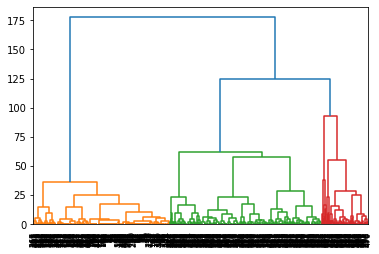

In [18]:
cluster_jerarquico=linkage(data_4, 'ward')
dendrogram(cluster_jerarquico, leaf_rotation=90., leaf_font_size=8.)
plt.show();

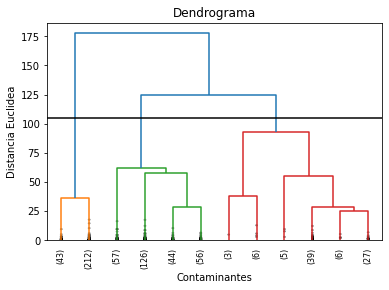

In [19]:
dendrogram(cluster_jerarquico, truncate_mode='lastp', p=12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Contaminantes')
plt.ylabel('Distancia Euclidea')
max_d = 105
plt.axhline(y=max_d, c='k')
plt.show()

In [20]:
hc=AgglomerativeClustering(n_clusters=3,
                          affinity='euclidean',
                          linkage='ward')
y_hc=hc.fit_predict(data_4)

In [21]:
data_4['Cluster_2']=hc.labels_
data_4.head()

,DBO5,SS,Cluster_2
0,5.0,5.0,1
1,5.0,4.0,1
2,5.0,3.0,1
3,5.0,3.0,1
4,5.0,4.0,1


## Análisis de los datos en función de los clusters

In [22]:
data_4["Cluster_2"].value_counts()

2    283
1    255
0     86
Name: Cluster_2, dtype: int64

In [23]:
data_4.groupby(['Cluster_2'])['DBO5'].mean()

Cluster_2
0    15.717442
1     4.982353
2     7.302473
Name: DBO5, dtype: float64

In [24]:
data_4.groupby(['Cluster_2'])['SS'].mean()

Cluster_2
0    17.826744
1     3.281569
2    10.966784
Name: SS, dtype: float64

El comportamiento en estas variables es muy siliar al comportamiento cuando teniamos las 4.

## Representación de clusters obtenidos

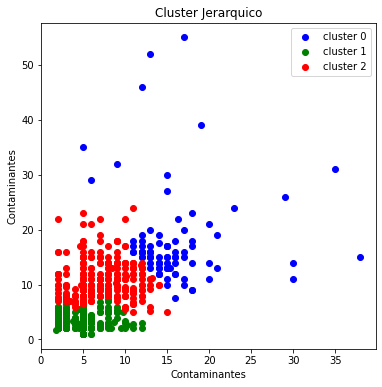

In [25]:
x=data_4.iloc[:, [0, 1, 2]].values
fig=plt.figure(figsize= (6,6))
ax =fig.add_subplot(1, 1, 1)
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], c='blue', label='cluster 0')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], c='green', label='cluster 1')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], c='red', label='cluster 2')
plt.title("Cluster Jerarquico")
plt.xlabel('Contaminantes')
plt.ylabel('Contaminantes')
plt.legend()
plt.show()

Al igual que en el caso anterior no mejora demasiado la distribución de los grupos,aparecen bastante poco definidos,complicados de separar.

## Comparación de ambos cluster jerarquicos

Se comparan ambos cluster,y a priori el 2 parece que divide más los cluster,que es menos robusto,aunque el número de variables también es menor.

In [26]:
data=pd.merge(data_2, data_4, on='SS')
data_5=data.drop(columns=['NT','PT','DBO5_x','DEPURADORA_2','SS','DBO5_y'])
data_5.head()

,Cluster,Cluster_2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
c=data_5.sample(10, random_state = 0)
c

,Cluster,Cluster_2
2298,0,1
12932,1,0
12312,1,2
7870,0,1
11812,0,2
2330,0,1
2365,0,1
8630,0,1
5968,0,1
16095,1,0


In [29]:
data_5.to_csv('jerarquico_cluster')